# Linear Regression

## Implementation of linear regression using normal Equation $$\hat{\theta} = (X^T.X)^{-1}.X^T.y$$

In [12]:
#importing required depedencies
import numpy as np                  #for numerical calculation
import matplotlib.pyplot as plt     #for data visualization
from sklearn.linear_model import LinearRegression      #import Linear Regression using scikit learn

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')

## Generate sample data for $y = mx + c$  equation

In [13]:
sample_size = 100                             # Sample size
x = 2*np.random.rand(sample_size,1)           #generate sample data for x                        
y = 4 + 3*x + np.random.rand(sample_size, 1)  #generate sample data for y

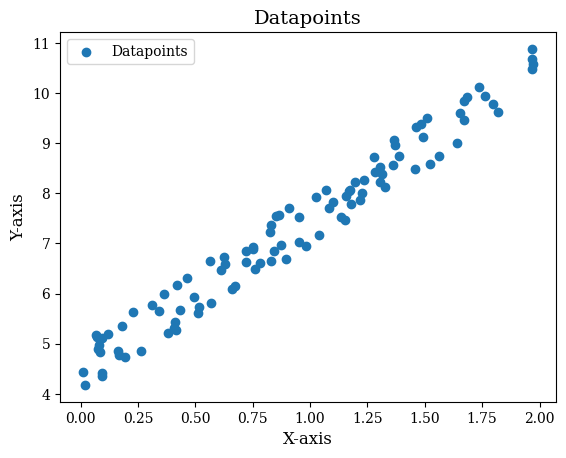

In [14]:
#plot point using scatter plot
plt.scatter(x, y, label = 'Datapoints')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Datapoints')
plt.legend()
plt.show()

In [15]:
#Adding bias to each term i.e. x0 = 1
x_b = np.c_[np.ones((sample_size, 1)), x]


In [16]:
best_theta = np.linalg.inv((x_b.T).dot(x_b)).dot(x_b.T).dot(y)  #Using noraml equation calculate theta_value that minimize the error.

## Predict value using theta

In [17]:
x_new = np.array([[0], [2]])            #generate numpy array of x_new            
x_new_b = np.c_[np.ones((x_new.shape[0], 1)), x_new] #adding bias x0 = 0 at x_new array


In [18]:
y_predict = x_new_b.dot(best_theta)    #predict value using best_theta
y_predict

array([[ 4.47322882],
       [10.56349286]])

## Let's plot the  predictions

Text(0.5, 1.0, 'Linear Regression')

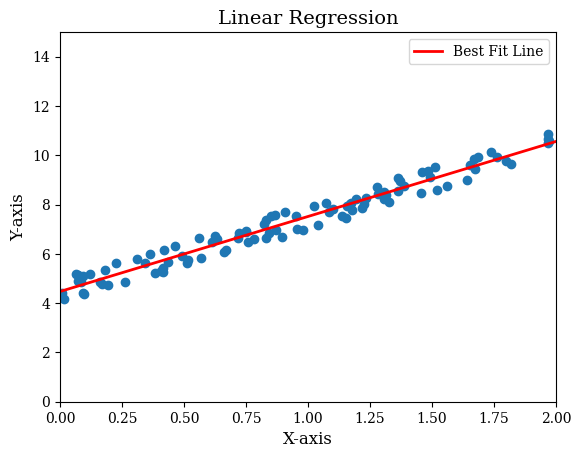

In [19]:
#plot prediction using matplotlib.pyplot library
plt.plot(x_new, y_predict, 'r-')       #plot prdiction against input value x
plt.scatter(x, y)                      #plot scatter of input value
plt.axis([0,2,0,15])                   #define range for x-axis and y-axis
plt.xlabel('X-axis')                   #define x-axis name
plt.ylabel('Y-axis')                   #define y-axis name
plt.legend(['Best Fit Line'])             #define prediction
plt.title('Linear Regression')         #define title of graph


## Calculate $\theta^{(next~Step)}$ using gradient descent $$\theta^{(next~Step)} = \theta - \eta~\nabla_{\theta}~MSE_{(\theta)}$$

Final epoch theta: (array([3.9000721]), array([3.53819299]))


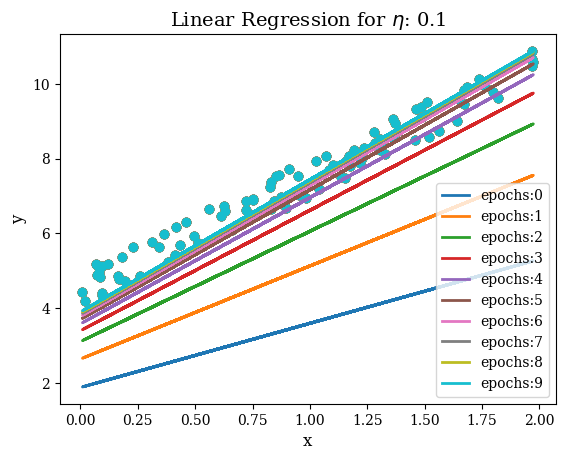

In [20]:
n_iteration = 10                                                  #define number of iteration
eta = 0.1                                                         #define learning rate eta = 0.1
theta = np.random.rand(x_b.shape[1],1)                            #initialize random theta
for i in range(n_iteration):                                      #iterate over number of iteration
    gradient = 2/sample_size * (x_b.T).dot(x_b.dot(theta)- y)     #calculate gradient
    theta -= eta * gradient                                       #calculate new theta
    y_predict = x_b.dot(theta)                                    #predict value using new theta 
    plt.scatter(x, y)
    plt.plot(x, y_predict, label = f"epochs:{i}")                 #plot prediction
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(r'Linear Regression for $\eta$: ' + f'{eta}')                                #plot title
print(f"Final epoch theta: {theta[0], theta[1]}")


## Implementation using scikit learn library

Model Intercept:  [4.47322882] 
Model Coefficient:  [[3.04513202]]


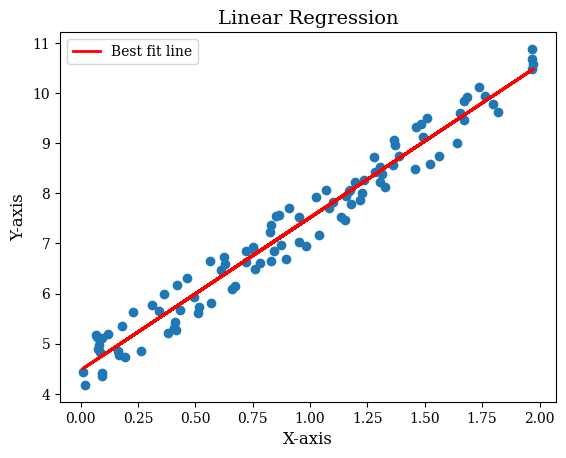

In [21]:
model = LinearRegression()                             #make model
model.fit(x, y)                                        #fit model on training data
y_pred = model.predict(x)                              #predict data on fitted model
plt.plot(x, y_pred, 'r-', label = 'Best fit line')     #plot predicted data on given data
plt.scatter(x,y)                                       #plot given data
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Linear Regression')                          #title of plot

print("Model Intercept: ", model.intercept_, "\nModel Coefficient: ", model.coef_)                            